<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/midterm/MLPNS2021midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MLPNS 2021 midterm

# population trends by country through clustering analysis

# Please read in full before you start!

This exercise combines the two machine learning methods that you have learned so far in this course: linear regression and clustering. 

There are multiple tasks and if you cannot complete some of them there are partial solutions you can access so you don’t get stuck and can continue the exercise and demonstrate your ability to do the following tasks. 

I have collected from the World Bank database population grows time series for several countries. 

## The overall goal is to identify countries that have similar population growth trends over the years and possibly countries that have anomalous population growth. 

You will be guided to 
- acquire the data, 
- explore it and prepare it, 
- fit a linear model to the each time series, 
- use the parameters you obtain from that fit as input feature to K-means clustering to group countries based on the trends in the population growth. 
- You will also be asked to look inside the group and if you have time identify reasons why the Countries within the clusters that may suggest why the trends are similar (thiw sill be very speculative of course)

**Make sure you show the characteristics of your data at every step** (by printing the shape of the data, the head of the data, the summary statistics of the data, or plot the data, whichever is apprioriate). 

**Every plot needs to have axis labels and a caption that describes what is being plotted and what should be noted in the plot** (e.g. global trends in the time series)

Your "grade" will be based on the rendered notebook, i.e. on the summary a tables and the plots as I see them and the captions that describe them (the captions can be markdown cells in the notebook).

After grading your notebook based on the rendered version I will restart it and run it. If it runs and produces  identical results you will get 100% of the points awarded in the previous step. Otherwise you will get 75%. **Make sure you stop a few minutes before the time expires to rerun the notebook!**

In [ ]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize

pl.rcParams['font.size'] = 18

# PART 1 - data preparation



# TASK 1.I - read in the data
the data is available in format _excel_. Pandas has a function, similar to ```read_csv()``` which you used in class, called ```read_excel()```. Download the data in your drive and read it in with this function. You can either download it and read it from your drive. Please put it in a folder My\ Drive/MLPNS (so that I can run the notebook seamlessly without having to change the path since I have the file stored in My\ Drive/MLPNS). 

At the end the file should look like mine below. You should not spend more than 20 minutes on this or you will not have enough time to finish. If after 20 minutes you are still working on it consider using the shortcut

## shortcut: 
if you have troubles reading in the original file with excel you can read in a csv file XXX

In [ ]:
#remove
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/MLPNS2021

/content/drive/MyDrive/MLPNS2021


In [ ]:
#remove
#commenting cause already done
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2021-04-13 11:47:43--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 52.188.136.184
Connecting to api.worldbank.org (api.worldbank.org)|52.188.136.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191488 (187K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel.5’

SP.POP.TOTL?downloa 100%[===================>] 187.00K  --.-KB/s    in 0.04s   

2021-04-13 11:47:43 (4.66 MB/s) - ‘SP.POP.TOTL?downloadformat=excel.5’ saved [191488/191488]



In [ ]:
!ls

 10802534_761689917241346_821292660_n.jpg
 country_pop_clean.csv
 country_pop.csv
 country_pop_final.csv
 grb050525A.csv
 healthcare-dataset-stroke-data.csv
 kaggle.json
 kalbar_drone_190113-768x512.jpg
 Madrid.jpg
 NYC_Women_s_Resource_Network_Database.csv
'SP.POP.TOTL?downloadformat=excel'
'SP.POP.TOTL?downloadformat=excel.1'
'SP.POP.TOTL?downloadformat=excel.2'
'SP.POP.TOTL?downloadformat=excel.3'
'SP.POP.TOTL?downloadformat=excel.4'
'SP.POP.TOTL?downloadformat=excel.5'
 stroke-prediction-dataset.zip


In [ ]:
pd.read_excel("SP.POP.TOTL?downloadformat=excel")

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2021-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN
263,"Yem

In [ ]:
#remove
#reding in simply to see how the data look
pd.read_excel("SP.POP.TOTL?downloadformat=excel", usecols=[0] + 
              list(range(4,100)), skiprows=[1,2]
      ).set_index("Data Source")

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,113500

In [ ]:
#reading in with appropriate rules. Note the data name. That is BAD! I should give it a meaningful name
datain = pd.read_excel("SP.POP.TOTL?downloadformat=excel", usecols=[0] + 
              list(range(4,100)), skiprows=[1,2]
      ).set_index("Data Source")
datain.columns = datain.iloc[0]
datain.drop("Country Name", inplace=True)
datain.head()


Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [ ]:
#datain = pd.read_csv("country_pop.csv", index_col=0)

In [ ]:
datain.tail()

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN
"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,6097035.0,6193384.0,6290365.0,6390574.0,6500816.0,6629999.0,6784695.0,6967941.0,7178675.0,7414158.0,7669694.0,7941898.0,8231910.0,8541605.0,8869370.0,9213084.0,9572175.0,9941109.0,10322043.0,10730862.0,11189177.0,11709993.0,12302124.0,12954155.0,13634076.0,14297613.0,14913315.0,15469274.0,15975668.0,16450310.0,16921149.0,17409072.0,17918373.0,18443691.0,18985000.0,19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN
South Africa,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,20942145.0,21496075.0,22069776.0,22665271.0,23281508.0,23913099.0,24552540.0,25195187.0,25836888.0,26480913.0,27138965.0,27827320.0,28556769.0,29333103.0,30150448.0,30993758.0,31841593.0,32678874.0,33495953.0,34297727.0,35100909.0,35930050.0,36800509.0,37718950.0,38672607.0,39633750.0,40564059.0,41435758.0,42241011.0,42987461.0,43682260.0,44338543.0,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN
Zambia,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,3918872.0,4045740.0,4179067.0,4319224.0,4466174.0,4619546.0,4778724.0,4943283.0,5112823.0,5287548.0,5468262.0,5656139.0,5851825.0,6055366.0,6265864.0,6481916.0,6701540.0,6923149.0,7146969.0,7372837.0,7598275.0,7820205.0,8036845.0,8246656.0,8451347.0,8656486.0,8869740.0,9096607.0,9339733.0,9597609.0,9866476.0,10140561.0,10415944.0,10692193.0,10971698.0,11256743.0,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN
Zimbabwe,3776681.0,3905034.0,4039201.0,4178726.0,4322861.0,4471177.0,4623351.0,4779827.0,4941906.0,5111337.0,5289303.0,5476982.0,5673911.0,5877726.0,6085074.0,6293875.0,6502569.0,6712827.0,6929664.0,7160023.0,7408624.0,7675591.0,7958241.0,8254747.0,8562249.0,8877489.0,9200149.0,9527203.0,9849125.0,10153852.0,10432421.0,10680995.0,10900502.0,11092766.0,11261744.0,11410714.0,11541217.0,11653242.0,11747072.0,11822719.0,11881477.0,11923914.0,11954290.0,11982224.0,12019912.0,12076699.0,12155491.0,12255922.0,12379549.0,12526968.0,12697723.0,12894316.0,13115131.0,13350356.0,13586681.0,13814629.0,14030390.0,14236745.0,14439018.0,14645468.0,NaN






#  TASK 1.II - clean the data

how many rows and columns are in the data? how many missing values? missing values should be removed. If there are not many observations (=countries) with missing data the easiest solution is to remove the countries entirely. Use the dataframe method ```dropna``` to remove them. Otherwise, if you are brave, you can input values using the dataframe method fillna (good luck!). If you have trouble here is your shortcut


print the number of countries and the length of the timeline

## shortcut: 
You can download the dataframe with missing values removed by row here XXX

In [ ]:
print("there are {} countries and {} time stamps in the data".
      format(*datain.shape))

there are 264 countries and 61 time stamps in the data


Cleaning the data from NaNs

In [ ]:
#cleaned dataset timestamps
# first remove the empty column 2020
datain = datain.dropna(axis=1, how='all')
print("missing values after removing 2020 time series", (datain.isna().sum()>0).sum())

missing values after removing 2020 time series 60


In [ ]:
#removing countries with mising values
datain = datain.dropna(axis=0)
print("missing values after cleaning", (datain.isna().sum()>0).sum())

missing values after cleaning 0


In [ ]:
print("there are {} countries and {} time stamps in the cleaned data".
      format(*datain.shape))

there are 258 countries and 60 time stamps in the cleaned data


# TASK 1.III - plot the data

plot the original data. plot all the time series in the same panel. Optionally, also make the plot in log-y space to better see the collection of the data. 

In [ ]:
print("statistics by country")
datain.T.describe()

statistics by country


Data Source,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,...,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
count,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,...,60.000000,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,60.000000,60.000000,6.000000e+01,60.00000,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,76268.633333,1.836226e+07,1.382323e+07,2.708297e+06,51547.350000,2.310997e+08,3.089065e+06,3.230120e+07,2.912377e+06,43115.100000,70931.666667,1.710348e+07,7.844875e+06,7.055823e+06,5.791651e+06,1.014531e+07,5.708700e+06,1.001677e+07,1.036261e+08,8.188234e+06,6.192513e+05,254637.700000,3.839761e+06,9.531757e+06,207672.033333,58012.100000,7.097296e+06,1.451981e+08,260412.733333,257786.100000,494239.416667,1.285836e+06,2.962206e+06,2.751896e+07,1.043297e+08,6.859265e+06,139080.550000,1.331635e+07,1.087870e+09,1.256839e+07,...,70367.583333,1.244289e+07,16704.950000,7.195087e+06,1.530217e+09,4.038010e+08,4.056507e+06,5.294639e+07,5.191432e+06,3.659157e+06,4.212467e+08,7.945082e+05,2.250451e+08,92343.066667,1.153443e+09,5.555886e+08,1.161218e+06,7.931584e+06,5.356678e+07,8343.333333,2.776689e+07,1.972949e+07,4.802801e+07,2.107421e+09,3.077458e+06,2.537738e+08,2.021626e+07,101658.783333,1.948534e+07,17403.533333,92237.516667,6.591965e+07,156696.10000,5.259711e+09,162405.350000,1.592782e+06,1.374138e+07,3.661848e+07,8.614972e+06,9.402160e+06
std,19260.693526,8.708064e+06,7.811889e+06,4.801448e+05,23530.923101,1.014472e+08,3.263646e+06,7.391230e+06,4.079758e+05,13723.916148,12611.418612,4.222071e+06,4.690041e+05,1.734487e+06,2.426612e+06,6.048466e+05,2.812949e+06,4.543462e+06,3.638191e+07,6.108439e+05,4.289019e+05,81387.204655,3.475282e+05,5.386018e+05,89514.587767,5678.338402,2.400396e+06,4.337248e+07,17611.178337,111226.080932,166027.578425,5.707175e+05,1.067175e+06,5.580294e+06,5.225711e+06,8.269168e+05,17315.444884,3.198620e+06,2.324561e+08,6.744790e+06,...,15676.995702,5.326031e+06,11284.217961,3.813454e+06,3.700509e+08,4.394833e+07,1.932430e+06,1.333432e+07,2.062656e+06,1.294434e+06,1.295576e+08,2.386634e+05,8.783745e+07,10551.697354,3.952240e+08,2.578985e+08,1.664602e+05,2.415640e+06,1.653658e+07,2025.793384,1.386847e+07,1.062652e+07,2.66786

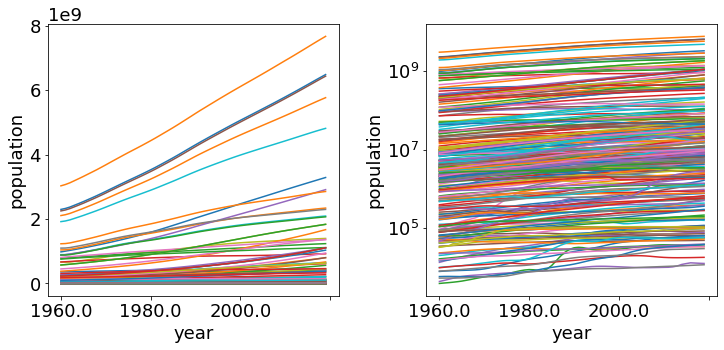

In [ ]:
# remove
fig, axs = pl.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.subplots_adjust(wspace=0.3)
ax1 = datain.T.plot(legend=False, ax=axs[0]);
ax1.set_xlabel("year")
ax1.set_ylabel("population");
ax2 = datain.T.plot(legend=False, ax=axs[1], logy=True);
ax2.set_xlabel("year")
ax2.set_ylabel("population");


Figure 1: plot of  population time series since 1960 through 2019 for all countries vith valid time series (no missing data) as sourced from the worldbank dataset (accessed 4/12/2020 http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel) in natural scale on the left and y-log scale on the right. The time series have a different mean  but all show a general increasing trend.

# TASK 1.IV - scale the data

# Preprocessing
Of course different countries have different population size. But we are only interested in the trends in these exercises, not in the overal size of the country. Thus before fitting a polynomial to the data you need to normalize the lightcurves: from each lightcurve you should remove the mean and divide by the standard deviation. You can do it by hand or you can use the ```preprocessing.scale``` function (there is an example of that in the slides https://slides.com/federicabianco/mlpns_4#/5/8)

_Each time series should be mean 0 and stdev 1_

I recommand working with a numpy array from here forward by extracting the values from the dataframe as ```X = df.values```

**After scaling the data replot it.**


In [ ]:
#remove
X = preprocessing.scale(datain, axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
print( "min and max mean", X.mean(axis=1).min(), X.mean(axis=1).max())

min and max mean -1.2138438402568378e-15 1.2360483007493409e-15


In [ ]:
print( "standard deviations", X.std(axis=1))

standard deviations [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


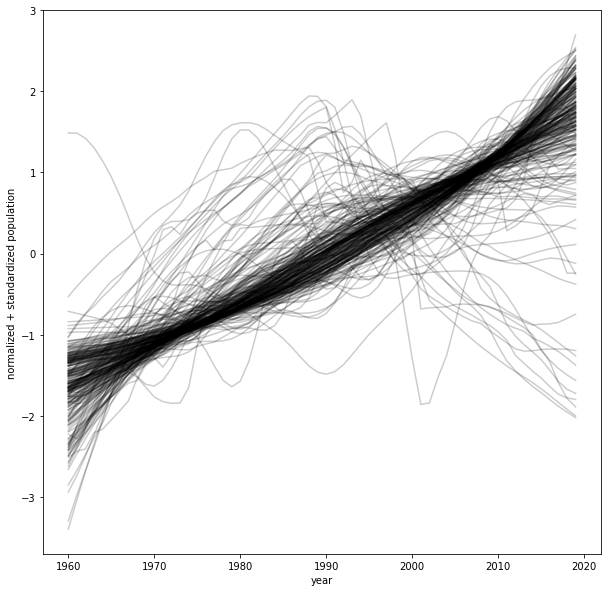

In [ ]:
pl.figure(figsize=(10,10))
pl.plot(X.T, c='k', alpha=0.2);
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");


Figure 2: plot of standardized population time series since 1960 through 2018 for all data plotted in Figure 1. This plot reveals a dominant increasing trend with some variations in time behavior. 

# PART 2 - modeling



# Task 2.I

fit a second degree polynomial (```y = ax^2 + bx + c```) to each time series. Store the values of a,b,c for each time series in an array called ```features``` (I recommand using L2 for the fit and ```scipy.optimize.minimize```)

**plot the histogram of each feature**

Optional: also store the value of L2 for the best fit parameters. Then your feature space would be 4-dimensional

In [ ]:
# create a mute index for the exogenous variable
xx = np.arange(X.shape[1])
xx


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [ ]:
def l2(theta, y):
  '''L2 target function
  input: 
    theta: parameter's array containing 3 entries
    y: target values array
  '''
  a, b, c = theta
  return sum((y - poly2(a, b, c))**2)
def poly2(a, b, c):
  '''second degree polynomial 
  input: 
    a: second degree coefficient
    b: first de
    gree coefficient
    c: intercept
  '''
  return a*xx**2 + b*xx + c


In [ ]:
scipy.optimize.minimize(l2, ig, args=ts)

      fun: 0.8377981764839547
 hess_inv: array([[ 1.15901897e-07, -6.83821357e-06,  6.61028028e-05],
       [-6.83821357e-06,  4.31240209e-04, -4.71973920e-03],
       [ 6.61028028e-05, -4.71973920e-03,  7.02143827e-02]])
      jac: array([ 1.26659870e-07, -7.45058060e-09,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([-3.76414565e-04,  7.92503464e-02, -1.89741745e+00])

SyntaxError: ignored

In [ ]:
features = []
# looping over each country
for ts in X:
  # since the time series are normalized I expect the intercept 
  # and the coefficients to be small
  ig = (1, 1, 0)   # initial guess
  fit = scipy.optimize.minimize(l2, ig, args=ts)
  #if I want to include goodness of fit as a feature
  features.append([*fit.x, fit.fun])

features = np.array(features)


In [ ]:
# adding the fourth feature was optional. If you did not then this shoudl be (258,4)
print("shape of the features array", features.shape)

shape of the features array (258, 4)


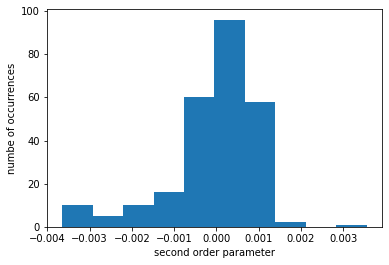

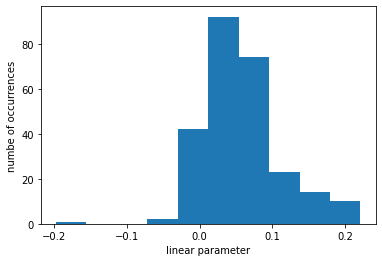

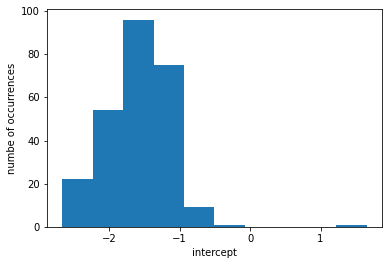

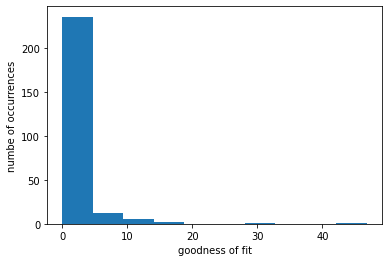

In [ ]:
labels = ["second order parameter",
          "linear parameter",
          "intercept",
          "goodness of fit"]
for i in range(features.shape[1]):
  pl.figure()
  pl.hist(features[:,i])
  pl.xlabel(labels[i])
  pl.ylabel("numbe of occurrences")



Figure 3: histogram of the polynomial coefficients for a second degree polynomial fit to each time series of population growth: the values of the coefficient and intercept is small, order unit or smaller, with a very small coefficient for the second degree of the polynomial (1e-2) indicating that the growth is largely linear. A small subset of lightcurves however show parameters farther away from the core of the distribution: a histogram bin at -0.2 slope and a histogram bin with positive intercept (close to 1). 
Also a subset of the lightcurves have poor fit value (~30 and ~40)

# TASK 2.II - preprocess the features

before you can use kmeans clusgtering you have to preprocess (scale) the features: all feature should have mean 0 and stdev 1 (you can again use sklearn.preprocess.scale

In [ ]:
#leave
X2 = preprocessing.scale(features, axis=0)
print("scaled features means (should be 0,0,0,0)\n", 
      X2.mean(axis=0))


scaled features means (should be 0,0,0,0)
 [ 6.66994453e-18 -5.32519765e-16 -1.70406325e-15 -3.42103606e-17]


In [ ]:
#leave
print("scaled features standard deviations (should be 1,1,1,1)\n", 
      X2.std(axis=0))


scaled features standard deviations (should be 1,1,1,1)
 [1. 1. 1. 1.]


# TASK 2.III - choosing the number of clusters 


cluster the data using kmeans in 2, 3, ... up to 10 clusters and print the total variance for each cluster. 

Plot the total variance as a function of number of clusters. See https://slides.com/federicabianco/mlpns_4#/8/4

Discuss the plot. Does it give insight into what is the the appropriate number of clusters?

Choose a number of clusters and for that choice show the cluster centers.

## shortcut

the elbow plot does not help ... use 4 clusters





i.c. variance with 1 clusters 774.00
i.c. variance with 2 clusters 366.24
i.c. variance with 3 clusters 212.57
i.c. variance with 4 clusters 153.18
i.c. variance with 5 clusters 112.65
i.c. variance with 6 clusters 75.87
i.c. variance with 7 clusters 59.16
i.c. variance with 8 clusters 43.94
i.c. variance with 9 clusters 35.91
i.c. variance with 10 clusters 28.97


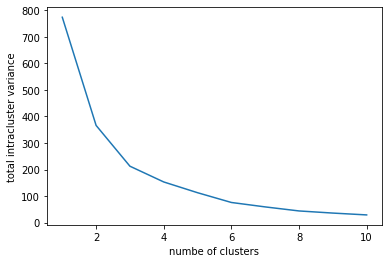

In [ ]:
#making an elbow plot to choose the right number of clusters
# chose here weather to use or not to to use the goodness of fit as a feature:
USEGF = False # if True uses the goodness of fit as a feature otherwise only the coefficients
if USEGF:
  Nf = X2.shape[1]
else:
  Nf = X2.shape[1] - 1


nmaxc = 10
nc = []
for i in range(1, nmaxc + 1):
  c = KMeans(n_clusters=i, random_state=302).fit(X2[:,:Nf])
  nc.append(c.inertia_)
  print("i.c. variance with {} clusters {:.2f}".format(i, c.inertia_))
pl.plot(range(1, nmaxc + 1), nc)

pl.xlabel("numbe of clusters")
pl.ylabel("total intracluster variance");

Figure 4: the "elbow" plot shows the intra-cluster compactness as a function of number of clusters. This quantity _mathematically_ is bound to decrease with the increasing number of clusters, but if there were evidence of a slower decrease after a specific value of the number of clusters this would indicate an optimal solution. Unfortunately there is no evidence at all of a change in slope in this case.


# TASK 2.IV - clustering


Note: the cluster centers are datapoints in the feature space. If your feature space is 3D (3 coefficients, or four depending on what you choose in task 2.II) your cluster center is a tuple of numbers. 

**However, the right way to show the cluster centers is to**

1- unscale the cluster centers by multiplying them by the stdev and adding back the mean 

2- plot the polynomial generated by those cluster centers

3- plot the time series that belong to that cluster in the same plot.

Print how many time series are in each cluster.

To measure the intracluster compactness (to make the elbow plot that may help you decide how many clusters to plot use the attribute of the cluster model
```kmeas_fit_model.inertia_```

To extract the cluster centers use 
```kmeas_fit_model.cluster_centers_```

To extract the cluster assignment for each time series use 

```kmeas_fit_model.labels_```

In [ ]:
print("this is the first cluster center", c.cluster_centers_[0])

this is the first cluster center [ 0.38614334 -0.3563025   0.20070481]


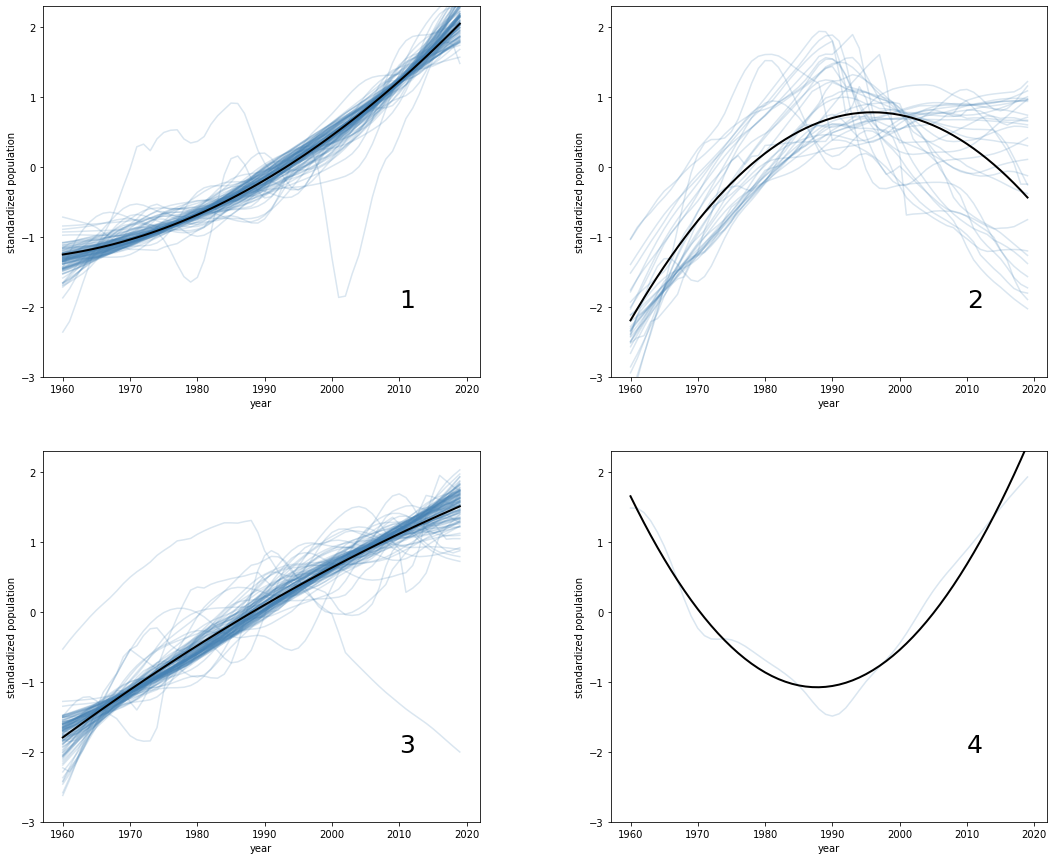

In [ ]:
Nclusters = 4

c = KMeans(n_clusters=4, random_state=302).fit(X2[:,:Nf])

fig = pl.figure(figsize=(18,15))
ax = fig.subplots(nrows=int(Nclusters/2 + 0.5), ncols=2)
ax = ax.flatten()



for i in range(4):
  ax[i].plot(X[c.labels_==i].T, c='SteelBlue', alpha=0.2)
  ax[i].plot(poly2(*c.cluster_centers_[i][:3] * 
                 features.std(axis=0)[:3] + features.mean(axis=0)[:3]), 
             'k', lw=2)  
  ax[i].set_xlabel("year")
  ax[i].set_xticks(ticks=range(0, 70, 10))
  ax[i].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)])
  ax[i].text(50, -2, i+1, fontsize=25)
  ax[i].set_ylim(-3, 2.3)

  ax[i].set_ylabel("standardized population");
pl.subplots_adjust(wspace=0.3)


Figure 5: The time series of world-wide population by country clustered in 4 clusters based on the shape of their standardize version. The cluster centers are shown as a black line, the individual time series are shown in blue. Four distinct behaniors are visible. Cluster 1, which is the larges cluster) shows a constant growth, cluster 2 shows an initial grows followed by a significant drop starting around 1990. Cluster 3, second largest, shows an increasing (slightly) growth rate; some outliers are visible, particularly a time series with an initial population drop throug the early 1990s. Cluster 4 shows an initial frows and a stabilization of the population starting in the late 1980s. Soe outliers are seen: especially a country with a popoulation drop in the 2020s.


# PART 3 - interpretation

extract the name of the countries in the 2 smallest clusters. Is there anything in common that gives away why they may have the same trends? If you have time try a quick google search

In [ ]:
for i in range(Nclusters):
  print ("number of elements in cluster {:d}: {:d}".format(
      i, np.sum(c.labels_==i)))

number of elements in cluster 0: 112
number of elements in cluster 1: 31
number of elements in cluster 2: 114
number of elements in cluster 3: 1


In [ ]:
print ("cluster 1 elements\n", datain.index[c.labels_ == 1])

cluster 1 elements
 Index(['Albania', 'Armenia', 'Bosnia and Herzegovina', 'Belarus',
       'Central Europe and the Baltics', 'Cuba', 'Dominica', 'Estonia',
       'Faroe Islands', 'Georgia', 'Greenland', 'Guyana', 'Croatia', 'Hungary',
       'Japan', 'Lithuania', 'Latvia', 'Moldova', 'North Macedonia',
       'Montenegro', 'Poland', 'Puerto Rico', 'Romania', 'Russian Federation',
       'Slovak Republic', 'Slovenia', 'Tonga', 'Ukraine',
       'St. Vincent and the Grenadines', 'Virgin Islands (U.S.)', 'Kosovo'],
      dtype='object', name='Data Source')


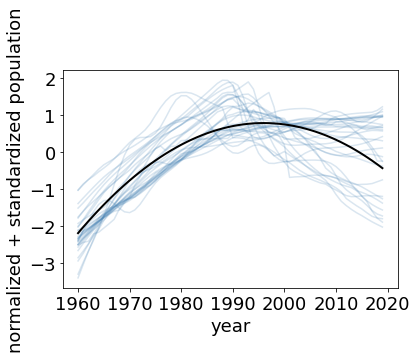

In [ ]:
# one cluster has as ignificant drop 30 years into the timeline. 
pl.plot(X[c.labels_==1].T, color='SteelBlue', alpha=0.2)
pl.plot(xx, poly2(*c.cluster_centers_[1][:3] * 
                 features.std(axis=0)[:3] + features.mean(axis=0)[:3]), 
        lw=2, c='k')
pl.xticks(ticks=range(0, 70, 10), labels=["%d"%i for i in range(1960, 2030, 10)])
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");

Figure 6: Most elements of cluster i=1 are eastern European countries. A brief internet search leads to a common cause for this population drop (which continues to this day)

'Albania', 'Armenia', 'Bosnia and Herzegovina', 'Belarus',
       'Central Europe and the Baltics', 'Estonia',
       'Georgia', 'Greenland',  'Croatia', 'Hungary',
      'Lithuania', 'Latvia', 'Moldova', 'North Macedonia',
       'Montenegro', 'Poland', 'Romania', 'Russian Federation',
       'Slovak Republic', 'Slovenia', 'Tonga', 'Ukraine',
       'Kosovo'.

Other elements of this cluster are in Central America
'Puerto Rico',  'Guyana',     'Cuba', 'Dominica', 'St. Vincent and the Grenadines', 'Virgin Islands (U.S.)'

And two more: 
'Japan',   'Faroe Islands', 

Between 1991-2015, the Baltic States and Bulgaria lost between 16% and 26% of their populations.
https://globalriskinsights.com/2019/10/population-decline-in-central-and-eastern-europe/

In [ ]:
print ("cluster 3 elements\n", datain.index[c.labels_ == 3])

cluster 3 elements
 Index(['St. Kitts and Nevis'], dtype='object', name='Data Source')


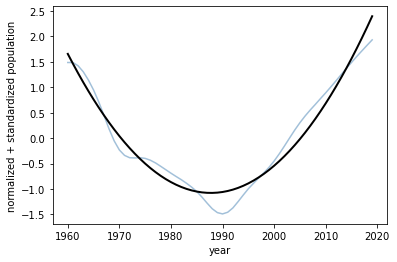

In [ ]:
# one cluster has as ignificant drop 30 years into the timeline. 
pl.plot(X[c.labels_==3].T, color='SteelBlue', alpha=0.5)
pl.plot(xx, poly2(*c.cluster_centers_[3][:3] * 
                 features.std(axis=0)[:3] + features.mean(axis=0)[:3]), 
        color='k', lw=2)
pl.xticks(ticks=range(0, 70, 10), labels=["%d"%i for i in range(1960, 2030, 10)])
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");

Figure 7: the main outlier in population growth is St. Kitts and Nevis, which is a very small Caribean island with only 40,834 ‎(1990) inhabitants.

# Alternatively one could cluster the time series directly

note: as a demonstration I am going to use a different implementation of the kmeans clustering in sklearn, but there are no differences in results when using one or the other.

## important
to cluster time series directly I have to scale them along the observations, not the features: standardize each time series


i.c. variance with 1 clusters 2592.84
i.c. variance with 2 clusters 1192.12
i.c. variance with 3 clusters 813.56
i.c. variance with 4 clusters 605.39
i.c. variance with 5 clusters 527.50
i.c. variance with 6 clusters 472.34
i.c. variance with 7 clusters 413.29
i.c. variance with 8 clusters 361.62
i.c. variance with 9 clusters 332.23
i.c. variance with 10 clusters 308.15


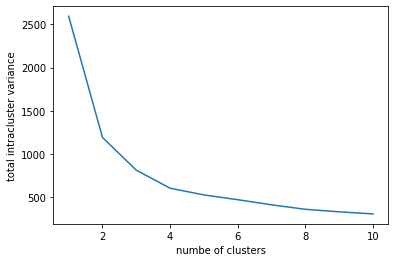

In [ ]:
from sklearn import cluster
nmaxc = 10
nc = []
for i in range(1, nmaxc + 1):
  c = cluster.k_means(X, i)
  nc.append(c[2])
  print("i.c. variance with {} clusters {:.2f}".format(i, c[2]))
pl.plot(range(1, nmaxc + 1), nc)

pl.xlabel("numbe of clusters")
pl.ylabel("total intracluster variance");


Figure 8: "Elbow plot" of k-means clustering of the time series in Figure 2. The plotted line represents the intracluster variance of the clustered data as a function of cluster numbers. While lower values are better, this is the target function of the algorithm, so the intracluster variance is bound to decrease with the number of cluster. A sharpe decrease in the slope, an "elbow" would indicate a good stopping point for clustering, but this plot does not show an "elbow". 


In [ ]:

# making sure I am clustering along the right axis: 
# each cluster center shoul de as long as the timeline: 59
print("shape of the feature space (observations x features)", X.shape)


shape of the feature space (observations x features) (258, 60)



# what is the appropriate number of clusters?


There is no clear answer from the elbow plot (Figure 3). In this case, a small number of clusters is preferable. We choose 4, although 3 or even 2 would be just as good a choice. 



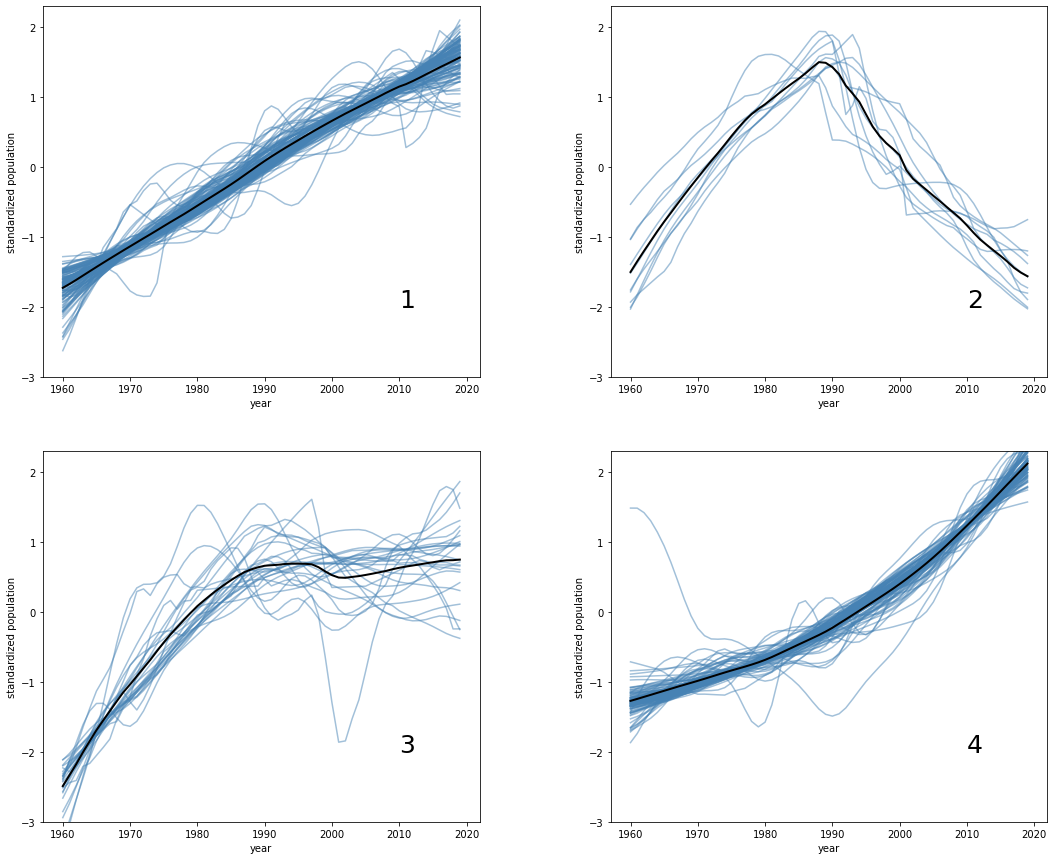

In [ ]:

#clustering
c = cluster.k_means(X, 4, random_state=333)
fig = pl.figure(figsize=(18,15))
ax = fig.subplots(nrows=2, ncols=2)
ax = ax.flatten()
for i in range(4):
  ax[i].plot(X[c[1] == i].T, c='SteelBlue', alpha=0.5)
  ax[i].plot(c[0][i], lw=2, c='k')
  ax[i].set_xlabel("year")
  ax[i].set_xticks(ticks=range(0, 70, 10))
  ax[i].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)])
  ax[i].text(50, -2, i+1, fontsize=25)
  ax[i].set_ylim(-3, 2.3)

  ax[i].set_ylabel("standardized population");
pl.subplots_adjust(wspace=0.3)



Figure 9: The time series of world-wide population by country clustered in 4 clusters based on the shape of their standardize version. The cluster centers are shown as a black line, the individual time series are shown in blue. Four distinct behaniors are visible. Cluster 1, which is the larges cluster) shows a constant growth, cluster 2 shows an initial grows followed by a significant drop starting around 1990. Cluster 3, second largest, shows an increasing (slightly) growth rate; some outliers are visible, particularly a time series with an initial population drop throug the early 1990s. Cluster 4 shows an initial frows and a stabilization of the population starting in the late 1980s. Soe outliers are seen: especially a country with a popoulation drop in the 2020s.


In [ ]:
for i in range(4):
  print ("number of elements in cluster {:d}: {:d}".format(
      i+1, np.sum(c[1] == i)))


number of elements in cluster 1: 123
number of elements in cluster 2: 10
number of elements in cluster 3: 26
number of elements in cluster 4: 99


['Bulgaria',
 'Bosnia and Herzegovina',
 'Estonia',
 'Georgia',
 'Croatia',
 'Hungary',
 'Lithuania',
 'Latvia',
 'Romania',
 'Ukraine']

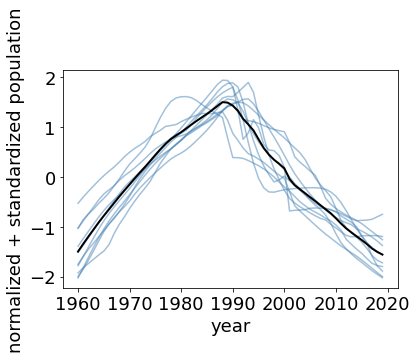

In [ ]:

# one cluster has as ignificant drop 30 years into the timeline. 
pl.plot(X[c[1] == 1].T, c='SteelBlue', alpha=0.5)
pl.plot(c[0][1], lw=2, c='k')
pl.xticks(ticks=range(0, 70, 10), labels=["%d"%i for i in range(1960, 2030, 10)])
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");
[datain.index[i] for i in np.where(c[1] == 1)[0]]



Figure 10: All elements of cluster 2 are eastern European countries. A brief internet search leads to a common cause for this population drop (which continues to this day)


Between 1991-2015, the Baltic States and Bulgaria lost between 16% and 26% of their populations.
https://globalriskinsights.com/2019/10/population-decline-in-central-and-eastern-europe/



## outliers

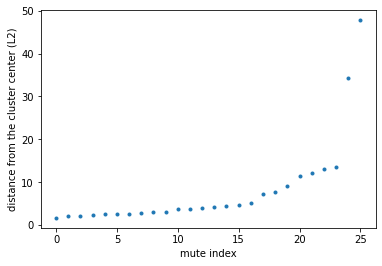

In [ ]:

# outlier in cluster 3
distances = np.array([np.sum((c[0][2] - ts)**2) for ts in X[c[1]==2]])
outliers = distances.argsort()
pl.plot(distances[outliers], '.')
pl.xlabel("mute index")
pl.ylabel("distance from the cluster center (L2)");

Figure 11: the distance to the cluster center for cluster i=2 (10 members). Two elements have outlier distances 

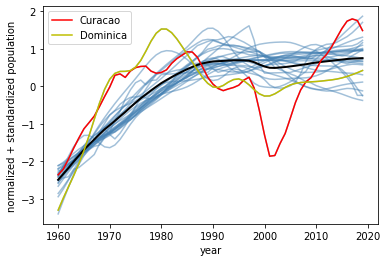

In [ ]:
pl.plot(X[c[1]==2].T, c='SteelBlue', alpha=0.5)
pl.plot(c[0][2], lw=2, c='k')
pl.plot(X[c[1]==2][outliers[-1]], c='r', 
        label=datain.index[c[1]==2][outliers[-1]])

pl.plot(X[c[1]==2][outliers[-2]], c='y',
        label=datain.index[c[1]==2][outliers[-2]])
pl.xticks(ticks=range(0, 70, 10), labels=["%d"%i for i in range(1960, 2030, 10)])
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])
pl.legend()
pl.ylabel("normalized + standardized population");
datain.index[c[1]==2][outliers[-2:]] ;


Figure 6: the main outlier in population growth are 'Dominica', 'Curacao'. These are small Carribean islands. Dominica, in the late 90s-early 2000s Dominica faced two hurrican, a widespred economic crisis, and an earthquake, and significant government changed. However, higher variance in population changes is expected in coutries with smaller overall population simply due to number statistics.




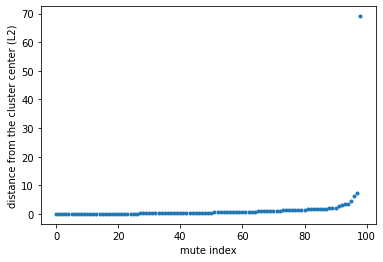

In [ ]:

# outlier in cluster 3
distances = np.array([np.sum((c[0][3] - ts)**2) for ts in X[c[1]==3]])
outliers = distances.argsort()

pl.plot(distances[outliers], '.');

pl.xlabel("mute index")
pl.ylabel("distance from the cluster center (L2)");


Figure 11: the distance to the cluster center for cluster i=3 (99 members). One elements is a significant outlier

'St. Kitts and Nevis'

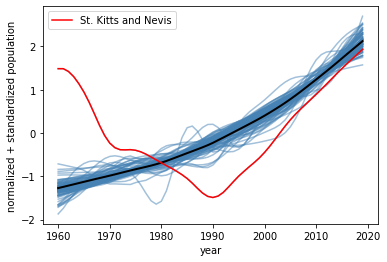

In [ ]:

pl.plot(X[c[1]==3].T, c='SteelBlue', alpha=0.5)
pl.plot(c[0][3], lw=2, c='k')

pl.plot(X[c[1]==3][outliers[-1]], c='r',
        label=datain.index[c[1]==3][outliers[-1]])


pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])
pl.legend()

pl.ylabel("normalized + standardized population");
datain.index[c[1]==3][outliers[-1]] 


Figure 12: the outlier in this cluster is St.Kitts and Nevis, which is a very small Caribean island with only 40,834 ‎(1990) inhabitants.